In [183]:
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import  Dropout
from keras.layers import Layer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.applications.vgg16 import VGG16 
import os
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,BatchNormalization
import copy
import sys
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
tf.__version__

'2.10.1'

In [26]:
target = []
data = []
dir='D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset'
#dir_test='D:\\A.document\\A.opencv\\projects\\apple_garden\\\Dataset_test'
#Categories = ['1','2','3','4']
Categories = ['1','3','4']

In [27]:
for i in Categories:
  print("Category is:",i,"\tLabel encoded as:",Categories.index(i))
  target_class = Categories.index(i)
  path = os.path.join(dir,i)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
    img_resized =cv2.resize(img_array,(124,124))
    data.append(img_resized)
    target.append(target_class)

data = np.array(data)
target = np.array(target)

print('end')

Category is: 1 	Label encoded as: 0
Category is: 3 	Label encoded as: 1
Category is: 4 	Label encoded as: 2
end


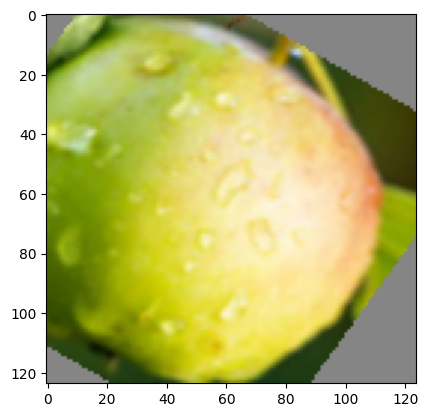

In [50]:
RGB_img=data[1520]
plt.imshow(RGB_img)
plt.show()

In [28]:
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.025)#test_size=0.03

X_test.shape

(60, 124, 124, 3)

In [252]:
#y_test

In [38]:
X_train.shape

(2339, 124, 124, 3)

In [29]:
class_number = 3

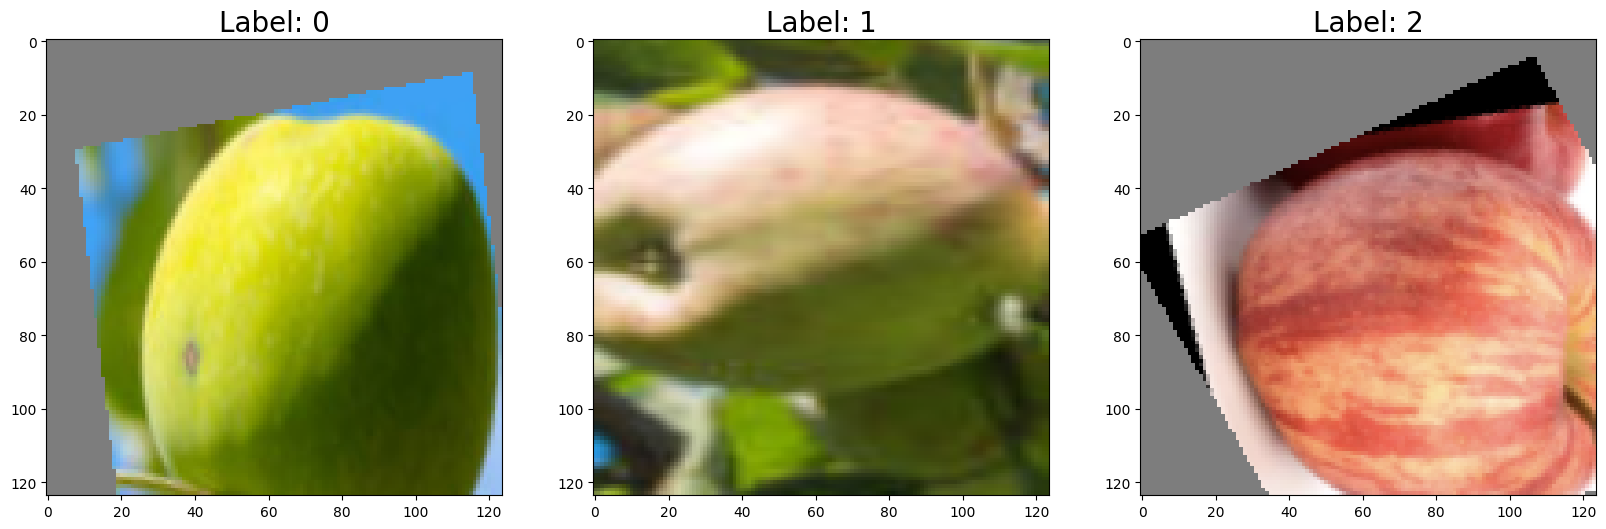

In [8]:

f, ax = plt.subplots(1, class_number, figsize=(20,20))

for i in range(0, class_number):
    apple_sample = X_train[y_train == i][0]
    #apple_sample =cv2.cvtColor(apple_sample,cv2.COLOR_BGR2RGB)
    ax[i].imshow(apple_sample)
    ax[i].set_title("Label: {}".format(i), fontsize=20)

In [30]:

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

print(X_train.shape[0], "train")
print(X_test.shape[0], "test")


y_train = keras.utils.to_categorical(y_train, class_number)
y_test = keras.utils.to_categorical(y_test, class_number)

2339 train
60 test


In [31]:
fa=keras.initializers.VarianceScaling(scale=1.0, mode='fan_avg', distribution='normal', seed=0) 
initializer = tf.keras.initializers.GlorotNormal(seed=0)
model1 = keras.Sequential(
    [
      keras.layers.Conv2D(32,(3,3), activation='elu',padding='same', input_shape = (124,124,3)), 
      keras.layers.BatchNormalization(),  
      keras.layers.Conv2D(32,(3,3), activation='elu', padding = 'same', kernel_initializer = fa),
      keras.layers.BatchNormalization(),  
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(64,(3,3), activation='elu', padding = 'same',kernel_initializer = fa),
      keras.layers.BatchNormalization(),  
      keras.layers.Conv2D(64,(3,3), activation='elu', padding = 'same',kernel_initializer = fa),
      keras.layers.BatchNormalization(),  
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Conv2D(128,(3,3), activation='elu', padding = 'same',kernel_initializer = fa),
      keras.layers.BatchNormalization(),  
      keras.layers.MaxPooling2D((2,2)),  
      keras.layers.Conv2D(256,(3,3), activation='elu', padding = 'same',kernel_initializer = fa),
      keras.layers.BatchNormalization(),  
      keras.layers.MaxPooling2D((2,2)),
      keras.layers.Flatten(),
      keras.layers.Dense(64,activation = 'elu', kernel_initializer = "he_uniform"),
      keras.layers.BatchNormalization(),
      keras.layers.Dense(64,activation = 'elu', kernel_initializer = "he_uniform"),
      keras.layers.BatchNormalization(),  
      keras.layers.Dense(3, activation= 'softmax')
    ]
)

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 124, 124, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      9248      
                                                                 
 batch_normalization_1 (Batc  (None, 124, 124, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                        

In [33]:
sgd=keras.optimizers.SGD(clipvalue=0.1)
adagrad_1=keras.optimizers.Adagrad(learning_rate=0.1)
adam=keras.optimizers.Adam(learning_rate=0.01)
Nadam=keras.optimizers.Nadam(learning_rate=0.01)
Adamax1=keras.optimizers.Adamax(learning_rate=0.01)

In [34]:
model1.compile(loss="categorical_crossentropy",
             optimizer=Adamax1,metrics=["accuracy"])

In [35]:
history = model1.fit(X_train, y_train,batch_size=12,epochs=3000,validation_split=0.025,
                        callbacks=[keras.callbacks.EarlyStopping(patience=35,monitor='val_accuracy',restore_best_weights=True),
                           keras.callbacks.ModelCheckpoint(filepath='Apple_Amin1.h5',monitor='val_accuracy',save_best_only=True)])

Epoch 1/3000
190/190 [==============================] - 13s 39ms/step - loss: 0.4893 - accuracy: 0.7969 - val_loss: 1.6064 - val_accuracy: 0.3559
Epoch 2/3000
190/190 [==============================] - 7s 37ms/step - loss: 0.4051 - accuracy: 0.8272 - val_loss: 0.3373 - val_accuracy: 0.8644
Epoch 3/3000
190/190 [==============================] - 7s 37ms/step - loss: 0.3637 - accuracy: 0.8583 - val_loss: 0.2960 - val_accuracy: 0.8814
Epoch 4/3000
190/190 [==============================] - 7s 37ms/step - loss: 0.3650 - accuracy: 0.8500 - val_loss: 0.4320 - val_accuracy: 0.8136
Epoch 5/3000
190/190 [==============================] - 7s 38ms/step - loss: 0.3329 - accuracy: 0.8689 - val_loss: 0.1816 - val_accuracy: 0.9492
Epoch 6/3000
190/190 [==============================] - 7s 37ms/step - loss: 0.3139 - accuracy: 0.8772 - val_loss: 0.3752 - val_accuracy: 0.8475
Epoch 7/3000
190/190 [==============================] - 7s 37ms/step - loss: 0.2895 - accuracy: 0.8873 - val_loss: 0.2588 - val_a

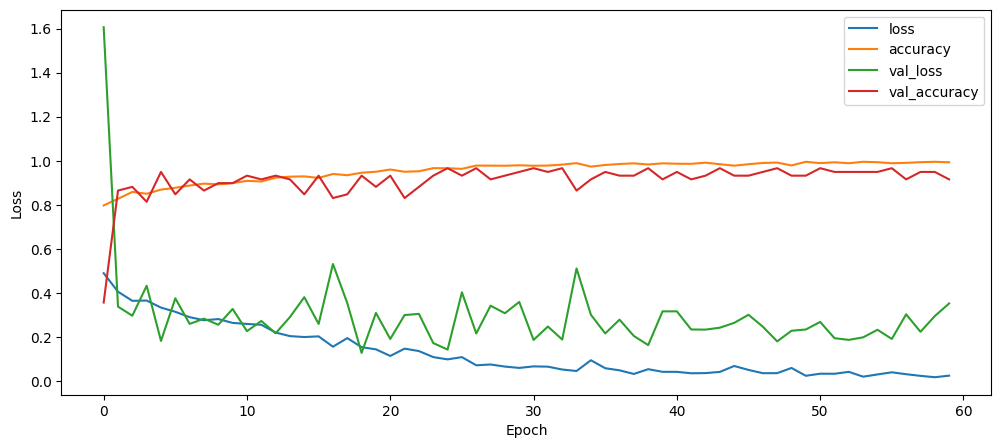

In [176]:
fig,ax = plt.subplots(figsize=(12,5))
ax=plt.plot(history.history["loss"],label="loss")
ax=plt.plot(history.history["accuracy"],label="accuracy")
ax=plt.plot(history.history["val_loss"],label="val_loss")
ax=plt.plot(history.history["val_accuracy"],label="val_accuracy")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [36]:
model1.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 1s 146ms/step - loss: 0.0564 - accuracy: 0.9833


[0.05643507465720177, 0.9833333492279053]

In [38]:
model2=keras.models.load_model("Apple_Amin1.h5")
y_pred_classes1 = model2.predict(X_test)
y_pred_classes1 = np.argmax(y_pred_classes1, axis=1)
print(y_pred_classes1)

2/2 [==============================] - 0s 268ms/step
[0 2 2 1 1 2 2 2 0 0 2 2 2 0 0 0 1 0 0 0 2 1 1 1 1 0 1 0 0 2 1 0 0 0 0 2 0
 2 2 0 1 2 2 2 0 2 0 2 0 2 2 1 2 1 0 2 2 0 0 0]


In [40]:
y_test = np.argmax(y_test, axis=1)
print(y_test)

[1 2 2 1 1 2 2 2 0 0 2 2 2 0 0 0 1 0 0 0 2 1 1 1 1 0 1 0 0 2 1 0 0 0 0 2 0
 2 2 0 1 2 2 2 0 2 0 2 0 2 2 1 2 1 0 2 2 0 0 0]


In [39]:
model2.evaluate(X_test,y_test,verbose=1)

2/2 [==============================] - 1s 31ms/step - loss: 0.0564 - accuracy: 0.9833


[0.05643507465720177, 0.9833333492279053]

46


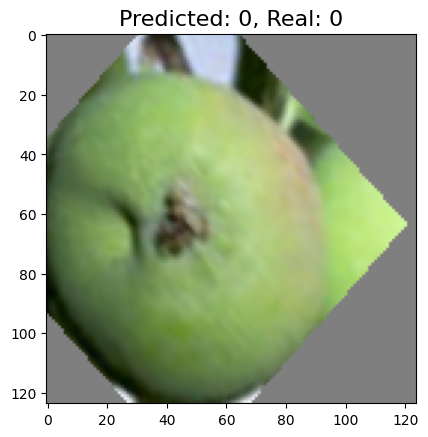

In [175]:
y_test1 = keras.utils.to_categorical(y_test, class_number)
random_idx = np.random.choice(len(X_test))
print(random_idx)
x_sample = X_test[random_idx]
y_true = np.argmax(y_test1, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes1[random_idx]

plt.title("Predicted: {}, Real: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(124,124,3), cmap='gray')

(124, 124, 3)
(1, 124, 124, 3)
1/1 [==============================] - 0s 424ms/step
[2]


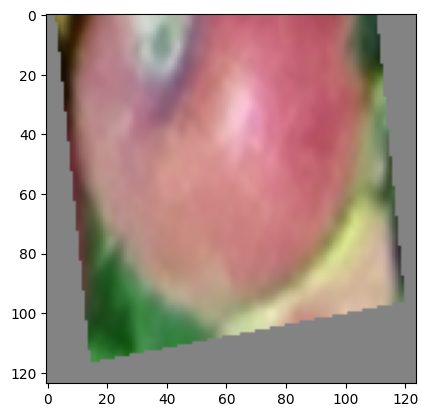

In [177]:
model2=keras.models.load_model("Apple_Amin1.h5")
img3_1 = cv2.imread('D:\\A.document\\A.opencv\\projects\\apple_garden\\Dataset_test\\4\\aug_101_2454.png')
img3_1=cv2.cvtColor(img3_1, cv2.COLOR_BGR2RGB)
plt.imshow(img3_1)

img3=copy.copy(img3_1)

img3=cv2.resize(img3,(124,124))
print(img3.shape)

img = img3.reshape(1, 124,124, 3)
print(img.shape)
img = img.astype('float32')
img = img / 255.0


y_pred1 = model2.predict(img)
y_pred1 = np.argmax(y_pred1, axis=1)
print(y_pred1)


In [179]:
y_test11 = np.argmax(y_test1, axis=1)
confusion_matrix1=confusion_matrix(y_test11, y_pred_classes1)
confusion_matrix1

array([[24,  0,  0],
       [ 1, 12,  0],
       [ 0,  0, 23]], dtype=int64)

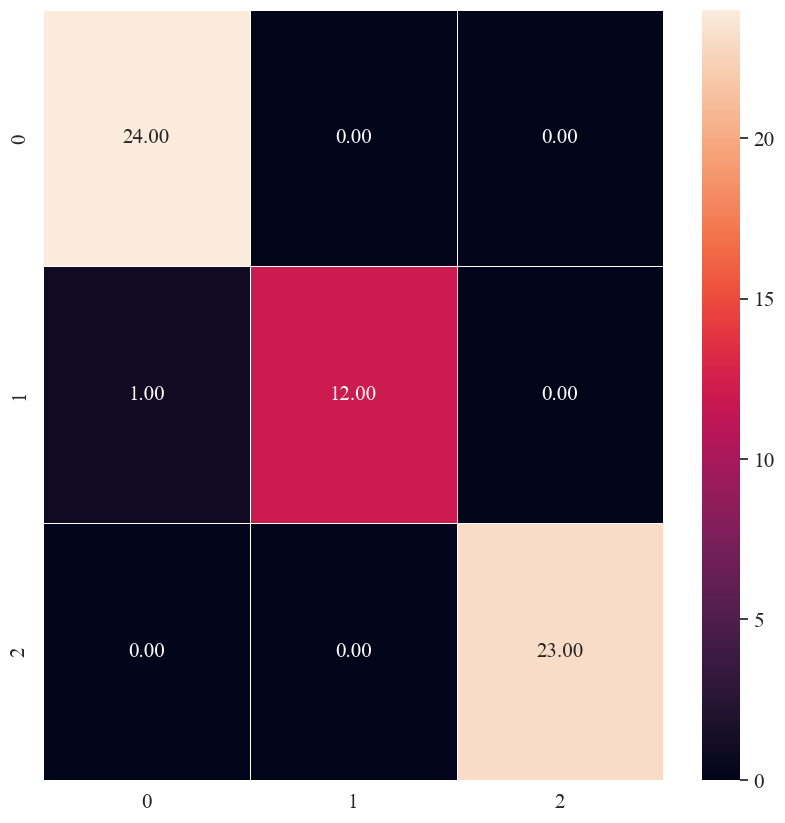

In [181]:
sns.set(font_scale=1.4)
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(10,10))

ax = sns.heatmap(confusion_matrix1,annot=True,fmt="0.2f",linewidth=.5, annot_kws={'size': 15})
ax.tick_params(labelsize=15)